Final Project Report

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
options(repr.matrix.max.rows = 6)
source("cleanup.R")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [2]:
url <- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
players_data <- read_csv(url)

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
clean_data <- players_data |>
select(experience, subscribe, played_hours, gender, age) |>
mutate(gender = as_factor(gender)) |>
mutate(experience = as_factor(experience)) |>
filter(age==20) #if we were looking at specifically individual's aged 20 this can make the data more specific, can also use all ages for generalization like graph below library(tidyverse)

gender_data <- players_data |>
select(gender, played_hours, age)|>
mutate(gender = as_factor(gender))
gender_data
clean_data

gender,played_hours,age
<fct>,<dbl>,<dbl>
Male,30.3,9
Male,3.8,17
Male,0.0,17
⋮,⋮,⋮
Prefer not to say,0.0,17
Male,2.3,17
Other,0.2,91


experience,subscribe,played_hours,gender,age
<fct>,<lgl>,<dbl>,<fct>,<dbl>
Veteran,TRUE,0.4,Male,20
Regular,TRUE,218.1,Non-binary,20
Regular,TRUE,0.0,Male,20
⋮,⋮,⋮,⋮,⋮
Regular,TRUE,0.5,Female,20
Veteran,TRUE,0.0,Agender,20
Amateur,TRUE,0.0,Male,20


In [10]:
options(repr.plot.height =12, repr.plot.width=15)

data_plot <-  gender_data|>
ggplot(aes(x=age, y=played_hours, color=gender)) +
geom_point(size=3) +
scale_y_log10() +
labs(x="Age", y="Played time(hours)", color="Gender") +
ggtitle("Total Played Hours by Age") +
theme(text=element_text(size=16)) +
scale_x_continuous() +
scale_color_brewer(palette="Set2")+
geom_vline(xintercept = 20, linetype = "dashed") +
geom_hline(yintercept = 100, linetype = "dashed") +
geom_point(aes(x = 20, y = 100), color = "red", size = 4, shape = 16)

Warning message in geom_point(aes(x = 20, y = 100), color = "red", size = 4, shape = 16):
“All aesthetics have length 1, but the data has 196 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”
Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”


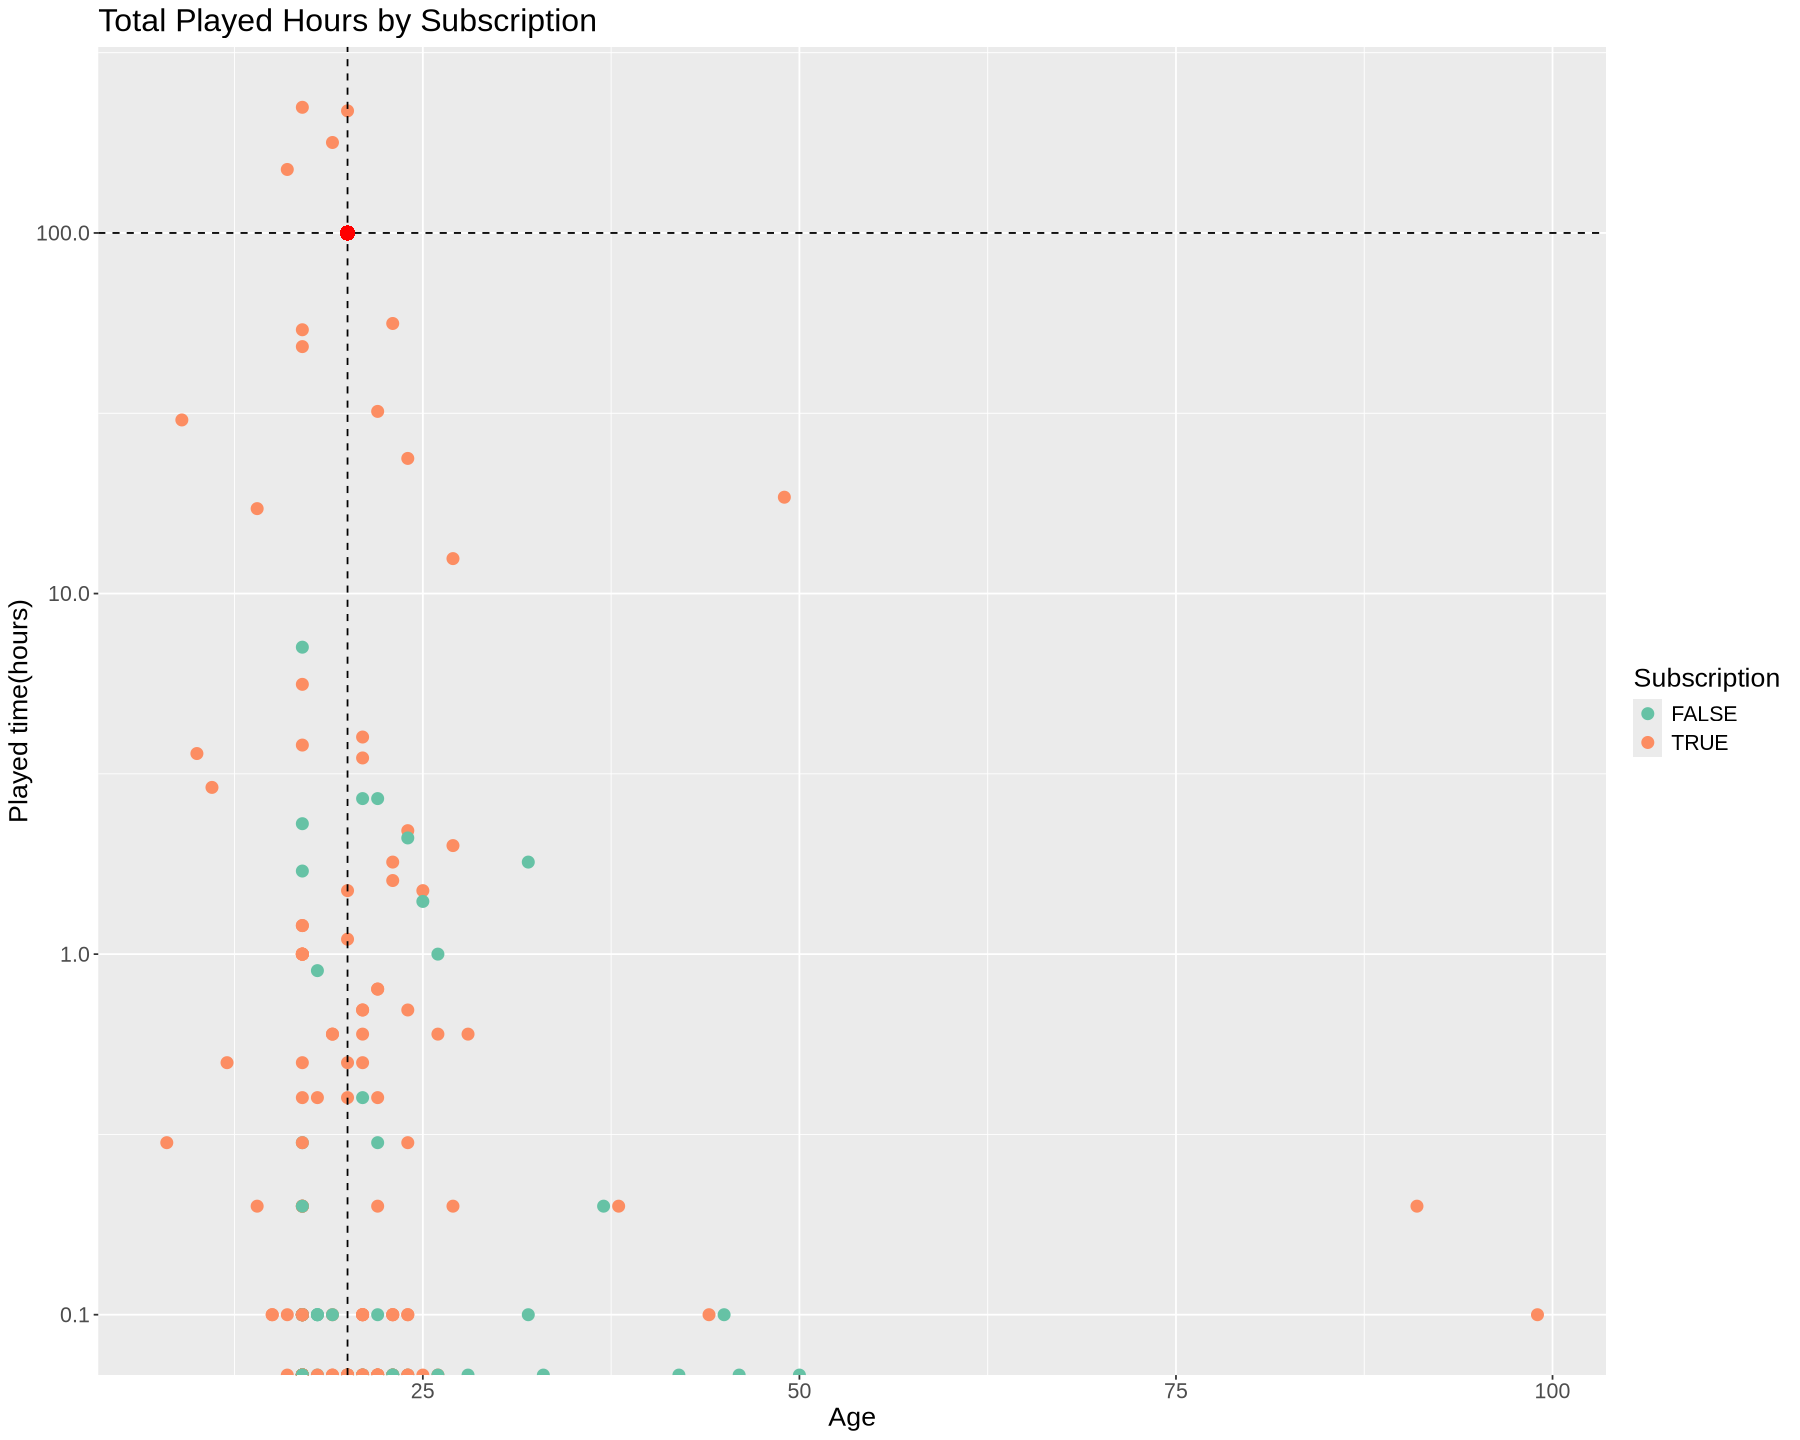

In [11]:
sub_data <- players_data |>
mutate(subscribe = as_factor(subscribe))

data_sub_plot <-  sub_data |>
ggplot(aes(x=age, y=played_hours, color=subscribe)) +
geom_point(size=3) +
scale_y_log10() +
labs(x="Age", y="Played time(hours)", color="Subscription") +
ggtitle("Total Played Hours by Subscription") +
theme(text=element_text(size=16)) +
scale_x_continuous() +
scale_color_brewer(palette="Set2")+
geom_vline(xintercept = 20, linetype = "dashed") +
geom_hline(yintercept = 100, linetype = "dashed") +
geom_point(aes(x = 20, y = 100), color = "red", size = 4, shape = 16)
data_sub_plot

Warning message in geom_point(aes(x = 20, y = 100), color = "red", size = 4, shape = 16):
“All aesthetics have length 1, but the data has 196 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”
Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”


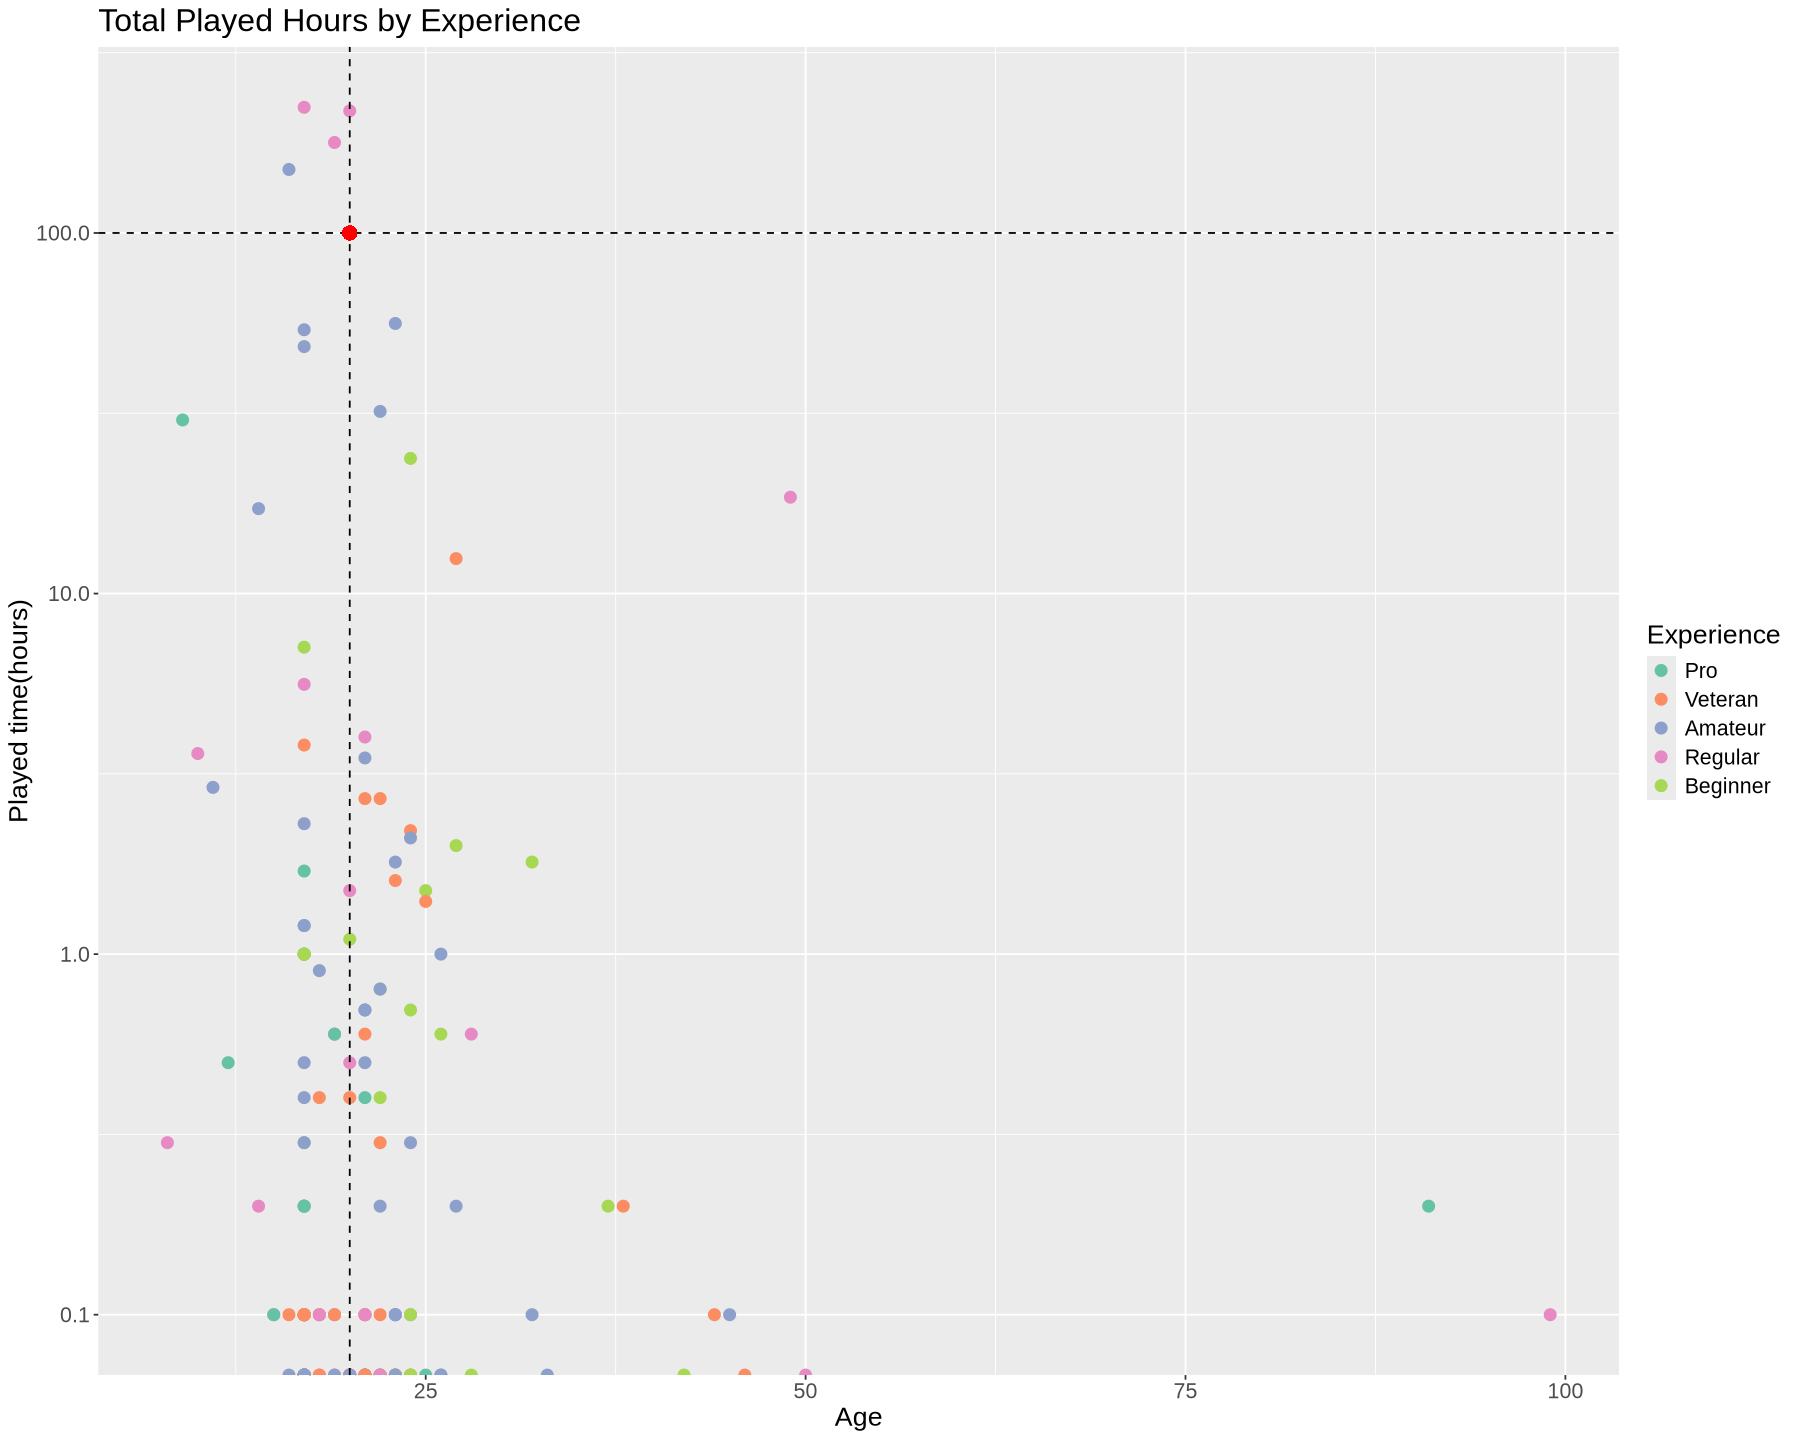

In [12]:
experience_data <- players_data |>
mutate(experience = as_factor(experience))

data_sub_plot <-  experience_data |>
ggplot(aes(x=age, y=played_hours, color=experience)) +
geom_point(size=3) +
scale_y_log10() +
labs(x="Age", y="Played time(hours)", color="Experience") +
ggtitle("Total Played Hours by Experience") +
theme(text=element_text(size=16)) +
scale_x_continuous() +
scale_color_brewer(palette="Set2")+
geom_vline(xintercept = 20, linetype = "dashed") +
geom_hline(yintercept = 100, linetype = "dashed") +
geom_point(aes(x = 20, y = 100), color = "red", size = 4, shape = 16)
data_sub_plot

In [13]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

set.seed(1234)

experience_split <- initial_split(experience_data, strata = experience, prop = 0.75)
experience_train <- training (experience_split)
experience_test <- testing (experience_split)

glimpse(experience_split)

List of 4
 $ data  : tibble [196 × 9] (S3: tbl_df/tbl/data.frame)
  ..$ experience      : Factor w/ 5 levels "Pro","Veteran",..: 1 2 2 3 4 3 4 3 3 2 ...
  ..$ subscribe       : logi [1:196] TRUE TRUE FALSE TRUE TRUE TRUE ...
  ..$ hashedEmail     : chr [1:196] "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d" "f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9" "b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28" "23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5" ...
  ..$ played_hours    : num [1:196] 30.3 3.8 0 0.7 0.1 0 0 0 0.1 0 ...
  ..$ name            : chr [1:196] "Morgan" "Christian" "Blake" "Flora" ...
  ..$ gender          : chr [1:196] "Male" "Male" "Male" "Female" ...
  ..$ age             : num [1:196] 9 17 17 21 21 17 19 21 17 22 ...
  ..$ individualId    : logi [1:196] NA NA NA NA NA NA ...
  ..$ organizationName: logi [1:196] NA NA NA NA NA NA ...
 $ in_id : int [1:145] 6 8 9 14 16 19 22 25 33 34 ...
 $ out_i

In [14]:
experience_recipe <- recipe(experience ~ age, data = experience_train)|> 
step_scale (all_numeric_predictors()) |>
step_center (all_numeric_predictors())

knn_spec <- nearest_neighbor (weight_func = "rectangular", neighbors = 90) |> 
set_engine ("kknn") |>
set_mode ("classification")

knn_fit <- workflow ()|>
add_recipe (experience_recipe) |>
add_model (knn_spec) |>
fit (data = experience_train) 

knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(90,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.6758621
Best kernel: rectangular
Best k: 90

In [17]:
experience_test_predictions <- predict (knn_fit, experience_test) |>
bind_cols (experience_test)

experience_test_predictions

experience_test_predictions |>
metrics(truth = experience, estimate = .pred_class)|>
filter (.metric == "accuracy")

.pred_class,experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<fct>,<fct>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Amateur,Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Amateur,Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA
Amateur,Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17,NA,NA
Amateur,Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22,NA,NA
Amateur,Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,NA,NA


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.3137255


In [18]:
experience_train

experience_train <- experience_train |>
filter (is.na (experience))

experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<fct>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA,NA
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21,NA,NA
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Veteran,TRUE,6b1cdc07fcc1f7ea09509341fd245dd34fdba386f14a493e9107c18604baedc9,0.1,Finnian,Non-binary,17,NA,NA
Pro,FALSE,f7875ae87a61632030d5c4029ee8cf081be7047b2b4a9c04ab5a706f59786197,0.2,Liam,Male,17,NA,NA
Veteran,TRUE,ba24bebe588a34ac546f8559850c65bc90cd9d51b821581bd6e25cff437a1081,0.1,Gabriela,Female,44,NA,NA


In [22]:
experience_vfold <- vfold_cv(experience_train, v=5, strata = experience)
k_vals <- tibble (neighbors = seq(1:100, by=2))

knn_spec <- nearest_neighbor(weight_func = "rectangular", neigbors = tune())|>
set_engine("kknn") |>
set_mode ("classification")

knn_results <- workflow() |>
add_recipe (experience_recipe) |>
add_mode (knn_spec) |>
tune_grid (resamples = experience_vfold, grid = k_vals) |> 
collect_metrics()

accuracies <- knn_results |>
filter(.metric == "accuracy")

accuracies

accuracy_vs_k <- ggplot (accuracies, aes(x=nighbors, y=mean)) + 
geom_point() +
geom_line() +
labs (x = "Neighbors", y = "Accuracy Estimate") +
theme(text = element_text (size = 12))

best_k <- accuracies |>
arrange (desc (mean)) |>
head(1) |>
pull (neighbors)

best_k

ERROR: [1m[33mError[39m in `vfold_cv()`:[22m
[33m![39m The number of rows is less than `v = 5`


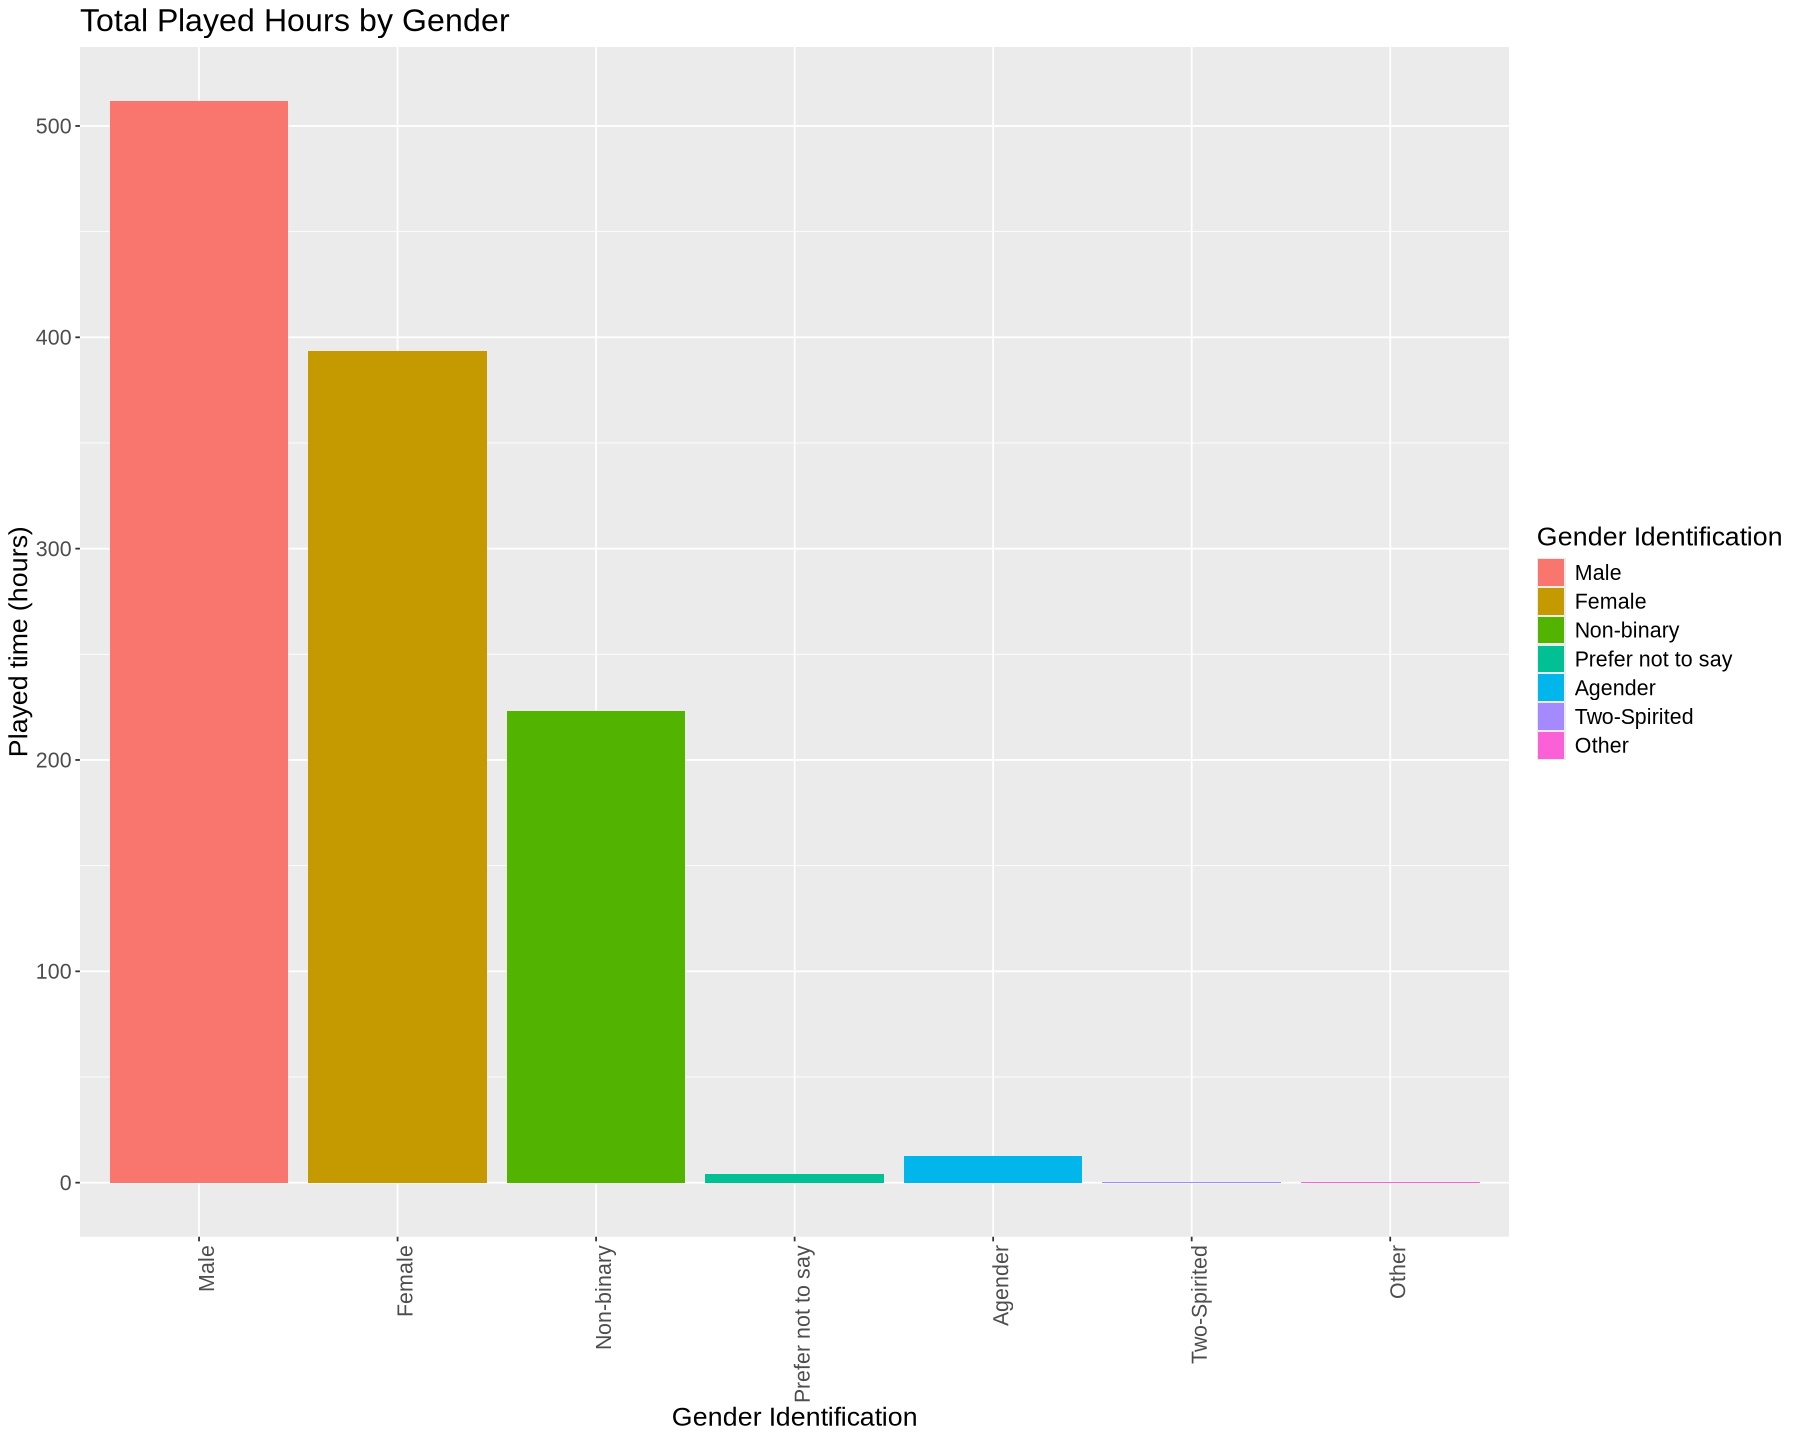

In [8]:
gender_data_plot <- gender_data |> 
ggplot(aes(x=gender, y= played_hours, fill= gender)) +
geom_bar(stat="identity") +
labs(x="Gender Identification", y= "Played time (hours)", fill = "Gender Identification") +
ggtitle("Total Played Hours by Gender") +
scale_color_brewer(palette="Set2") +
theme(text=element_text(size=16), axis.text.x=element_text(angle=90, hjust=1))
gender_data_plot